In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold, cross_validate, StratifiedKFold

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

In [3]:
inner_cv = StratifiedKFold(n_splits = 3, shuffle=True,random_state=42)
outer_cv = StratifiedKFold(n_splits = 10, shuffle=True,random_state=42)

In [4]:
hyperparams_GB = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
}

grid_GB = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=hyperparams_GB,
    scoring='roc_auc',  # Beispiel für mehrklassige AUC
    cv=inner_cv,                     # innere CV (z.B. 3-fach)
)
scores_GB = cross_validate(grid_GB, X=X, y=y, cv=outer_cv, scoring=["roc_auc", "accuracy"], return_train_score=True)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y 

In [5]:
df = pd.DataFrame(scores_GB)

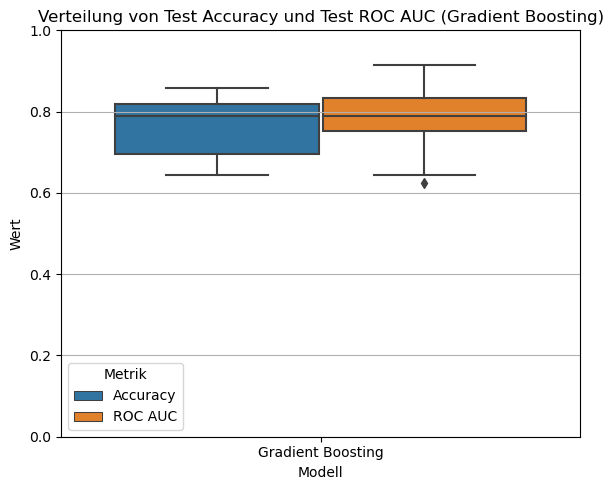

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plot_data = pd.DataFrame({
    'Metrik': ['Accuracy'] * len(df) + ['ROC AUC'] * len(df),
    'Wert': list(df['test_accuracy']) + list(df['test_roc_auc']),
    'Modell': ['Gradient Boosting'] * (2 * len(df))  # Dummy-Spalte für konsistente X-Achse
})

# Plot
plt.figure(figsize=(6, 5))
sns.boxplot(data=plot_data, x='Modell', y='Wert', hue='Metrik')

plt.title('Verteilung von Test Accuracy und Test ROC AUC (Gradient Boosting)')
plt.ylim(0.0, 1.0)
plt.grid(axis='y')
plt.legend(title='Metrik', loc='lower left')
plt.tight_layout()
plt.show()


In [7]:
model_evaluation = pd.DataFrame({"Fold": range(1, 11)})
model_evaluation['Modell'] = ['Gradient Boosting'] * 10
model_evaluation['ROC_AUC'] = df['test_roc_auc']
model_evaluation['Accuracy'] = df['test_accuracy']
model_evaluation

,Fold,Modell,ROC_AUC,Accuracy
0,1,Gradient Boosting,0.772222,0.827586
1,2,Gradient Boosting,0.850000,0.793103
2,3,Gradient Boosting,0.811111,0.793103
3,4,Gradient Boosting,0.777778,0.655172
4,5,Gradient Boosting,0.802778,0.827586
5,6,Gradient Boosting,0.915205,0.785714
6,7,Gradient Boosting,0.842105,0.857143
7,8,Gradient Boosting,0.643275,0.642857
8,9,Gradient Boosting,0.746875,0.750000
9,10,Gradient Boosting,0.625000,0.678571


In [8]:
model_evaluation.to_pickle('model_evaluation/Gradient_Boosting.pkl')